# Seaborn questions
## Question 1

The "flights" dataset is available via Seaborn (it can be accessed the same way as the tips data in the examples), and consists of three columns: year, month, and passengers. Create a 2-by-2 grid of plots where each plot represents a quarter of the year, e.g. quarter 1 contains January, February, March. For each quarter, plot how the number of passengers per month changes over the years. Use a custom colour palette to assign different colours to each month.

In [20]:
# Load libraires.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Get Seaborn available datasets.
sns.get_dataset_names()

# Load the flights dataset and explore its shape.
flights_data = sns.load_dataset("flights")
print(flights_data.head())
print(f"\nThis dataframe has {flights_data.shape[0]} rows and {flights_data.shape[1]} columns.")

/home/josemari/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /home/josemari/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

This dataframe has 144 rows and 3 columns.


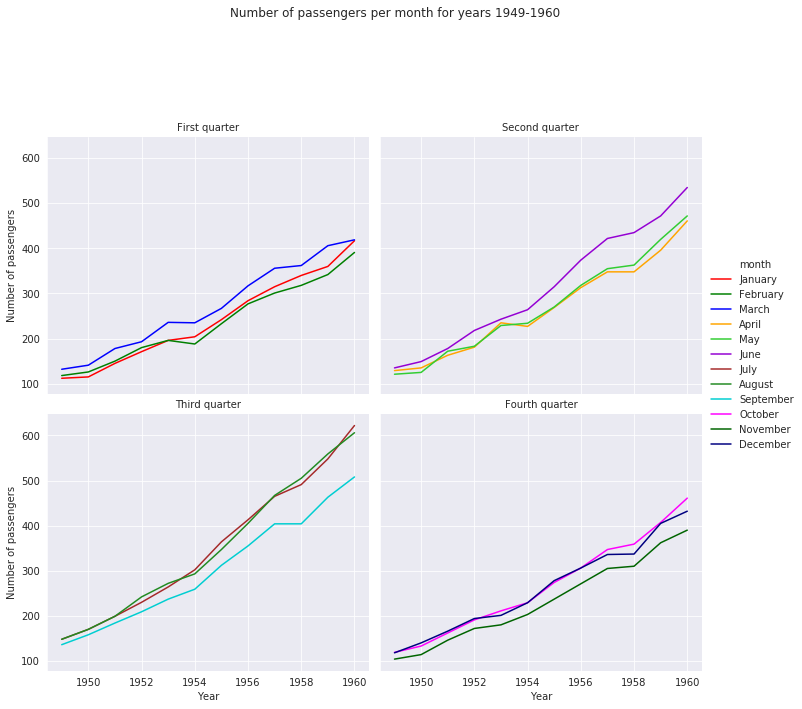

In [22]:
# Create empty list to store the ID for months belonging to each quarter of the year.
quarter_year = []

# Iterate over months.
for month in flights_data["month"]:
    
    # Assign to Jan-Mar the number 1 for first quarter, Apr-Jun the number 2 for second quarter, etc. 
    if month == "January" or month == "February" or month == "March":
        
        # Append the quarter corresponding number to the empty list.
        quarter_year.append("First quarter")
    elif month == "April" or month == "May" or month == "June":
        quarter_year.append("Second quarter")
    elif month == "July" or month == "August" or month == "September":
        quarter_year.append("Third quarter")
    elif month == "October" or month == "November" or month == "December":
        quarter_year.append("Fourth quarter")

# Add the quarter list to the flights dataframe as new colum.
flights_data["quarter"] = quarter_year

# Create a custom colour dict.
colour_dict = {"January" : "red", "February" : "green", "March" : "blue",
               "April" : "orange", "May" : "limegreen", "June" : "darkviolet",
               "July" : "brown", "August" : "forestgreen", "September" : "darkturquoise",
               "October" : "magenta", "November" : "darkgreen", "December" : "navy"}
# Plot with seaborn.
my_plot = sns.relplot(x = "year", y = "passengers", hue = "month", col = "quarter", col_wrap = 2, kind = "line",
                      palette = colour_dict, data = flights_data)

# Tidy up the plot.
my_plot.set_titles("{col_name}")
my_plot.set_axis_labels("Year", "Number of passengers")
my_plot.fig.suptitle("Number of passengers per month for years 1949-1960")
plt.subplots_adjust(top = 0.9)

# Question 2

One of your researcher friends has asked you to help them make a figure for a poster they will be presenting. Their supervisor is colorblind, and hates plots without gridlines. Their data is available using sns.load_dataset("mpg"), and they want two subplots in their figure:

    The first subplot should show the difference in the distribution of MPG in cars manufactured in USA, Japan, and Europe.
    The second subplot should show the relationship between horsepower and MPG for the same regions as above. Try and make the figure most suitable for your friend.


In [23]:
# Load the dataset.
cars_data = sns.load_dataset("mpg")
cars_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Text(0.5, 0.98, 'Cars features across USA, Japan and Europe')

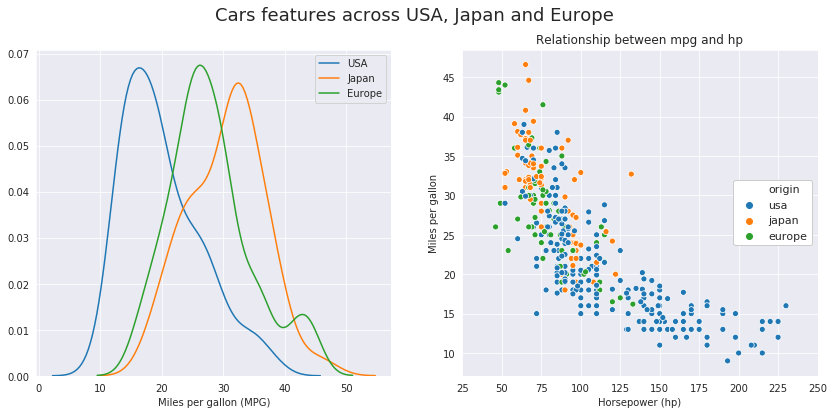

In [26]:
# Get mpg for each country into a variable.
eu_mpg = cars_data[cars_data["origin"]=="europe"]
usa_mpg = cars_data[cars_data["origin"]=="usa"]
japan_mpg = cars_data[cars_data["origin"]=="japan"]

# Plot in one line with two axes.
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6), sharey = False)

# Plot the three mgp on the same axes separately.
sns.distplot(usa_mpg["mpg"], ax = ax1, label = "USA", hist = False)
sns.distplot(japan_mpg["mpg"], ax = ax1, label = "Japan", hist = False)
sns.distplot(eu_mpg["mpg"], ax = ax1, label = "Europe", hist = False)
ax1.set(xlabel = "Miles per gallon (MPG)")
ax1.legend()

sns.scatterplot(x = "horsepower", y = "mpg", hue = "origin", ax = ax2, data = cars_data)
ax2.set(xlabel = "Horsepower (hp)", xlim = [25, 250], xticks = range(0, 251, 25), ylabel = "Miles per gallon",
        title = "Relationship between mpg and hp")
ax2.legend(loc = "center right", fontsize = "11", markerfirst = True, facecolor = "white", framealpha = 1)

fig.suptitle("Cars features across USA, Japan and Europe", fontsize = 18) 